W projekcie przeanalizowaliśmy zestaw danych zawierający informacje na temat składu, typu i charakterystyki różnych próbek szkła. Skupiliśmy się na znalezieniu zależności pomiędzy składem szkła a jego typem. W tym celu posłużyliśmy się metodami uczenia maszynowego. W tym celu wykorzystaliśmy następujące algorytmy:
- Metoda najbliższych sąsiadów (KNN)
TODO

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("./glass.csv")
print(data.head())
cols = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


Podstawowe informacje o danych:

In [36]:
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

Zestaw danych zawiera 214 próbek szkła, które zostały podzielone na 6 klas.
Plik z danymi składa się z informacji o indeksie refrakcji danego typu szkła, składzie szkła (z jakich pierwiastków się składa), oraz typie szkła - jego zastosowaniu.
Szkło jest wykonane w różnym stopniu z następujących pierwiastków: magnezu, aluminium, krzemu, potasu, wapna, baru i żelaza. 
Typy szkła to: przetworzone szkło budowlane typu float (building_windows_float_processed), przetworzone szkło budowlane typu nonfloat (building_windows_non_float_processed),
przetworzone szkło dla pojazdów float (vehicle_windows_float_processed), pojemników (containers), zastawy stołowej (tableware), reflektorów (headlamps). 
Typ oznaczony jako 4 nie występuje w bazie danych.

<AxesSubplot:>

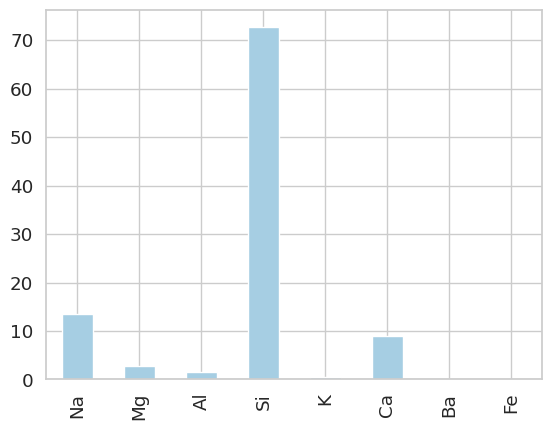

In [66]:
#Wykres zawartości poszczególnych pierwiastków

data_mean = data.drop(columns=["Type", "RI"],axis = 1)
data_mean = data_mean.mean()
data_mean.plot.bar()

Na powyższym wykresie przedstawiono średnią zawartość poszczególnych pierwiastków w szkłach.

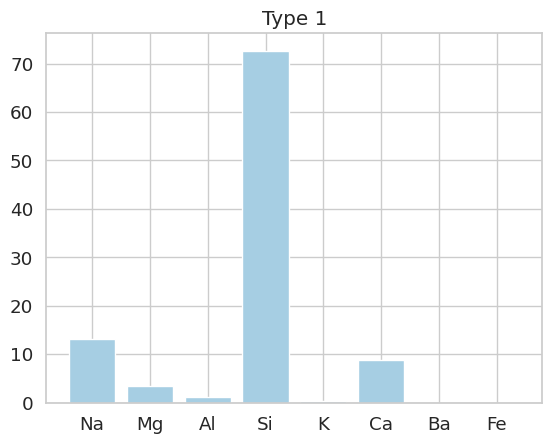

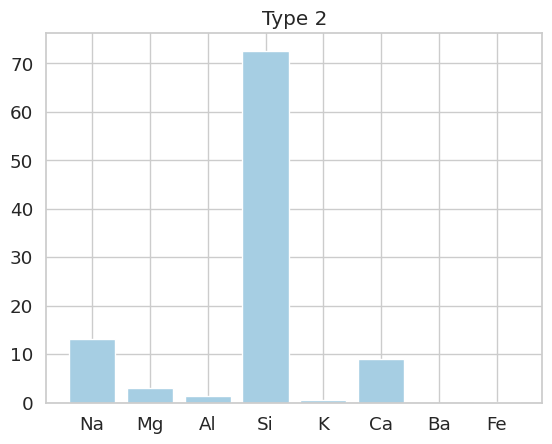

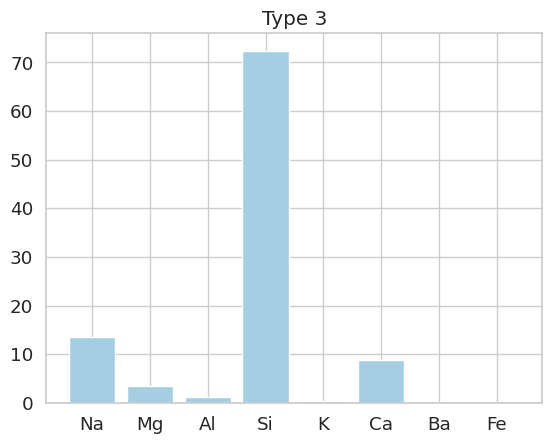

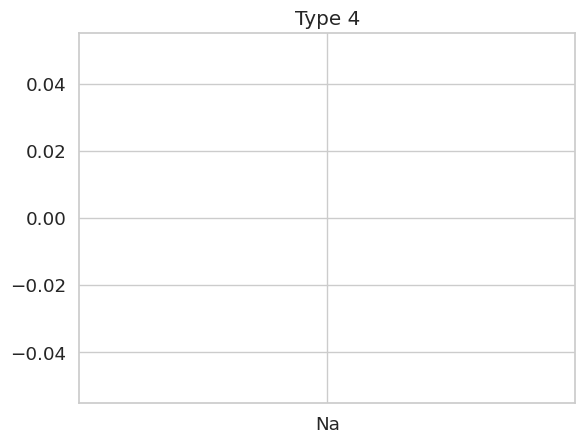

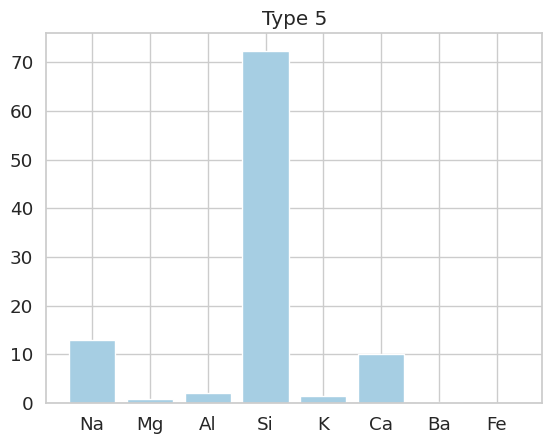

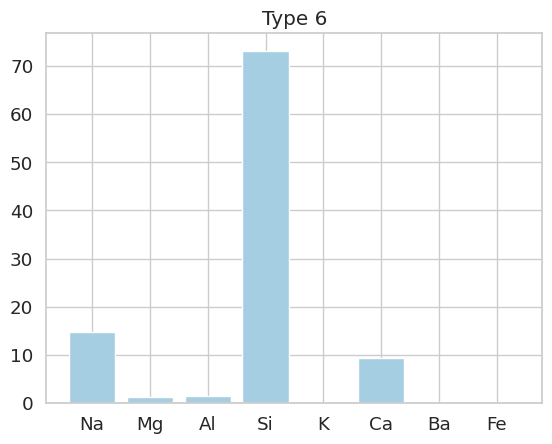

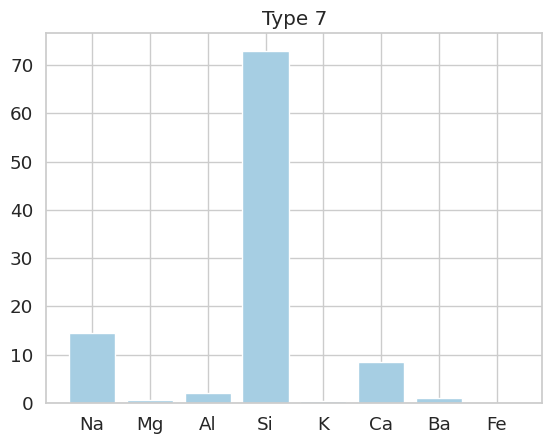

In [ ]:
#Zawartość poszczególnych pierwiastków różnych typach szkła
data1 = data.drop(columns=["RI"],axis = 1)
x_values = ["Na","Mg","Al","Si","K","Ca","Ba","Fe"]
for i in range(1,8):
    data_plot = data1.loc[data['Type'] == i]
    data_plot = data_plot.drop(columns=["Type"],axis = 1)
    data_plot = data_plot.mean()
    y_values = data_plot.tolist()
    plt.title(f'Type {i}')
    plt.bar(x_values,y_values)
    plt.show()
#    data_plot.plot.bar()


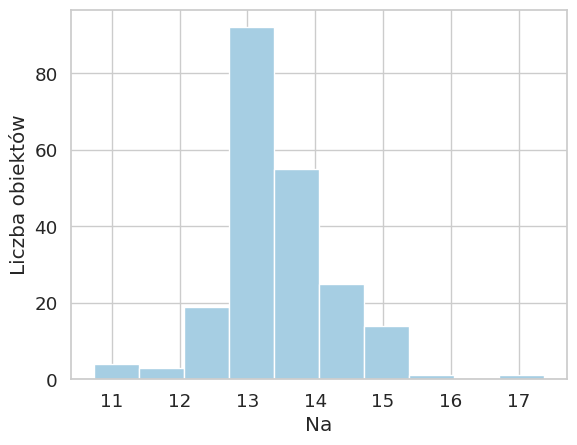

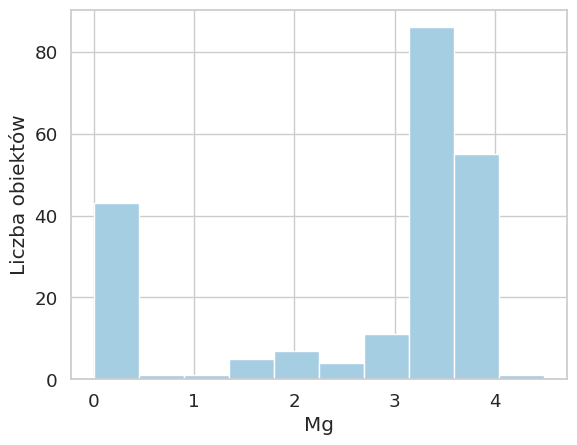

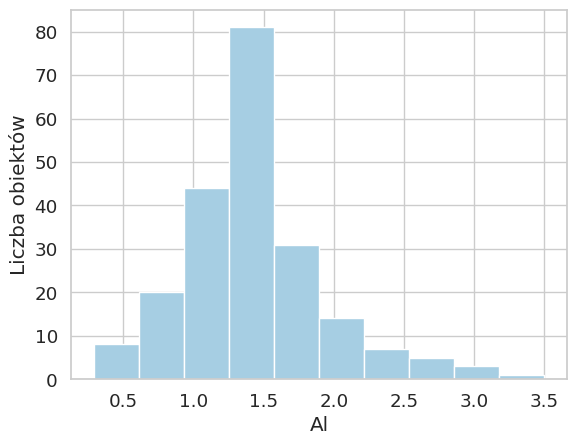

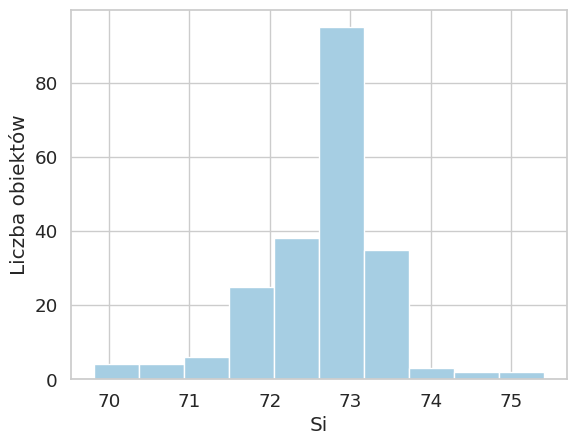

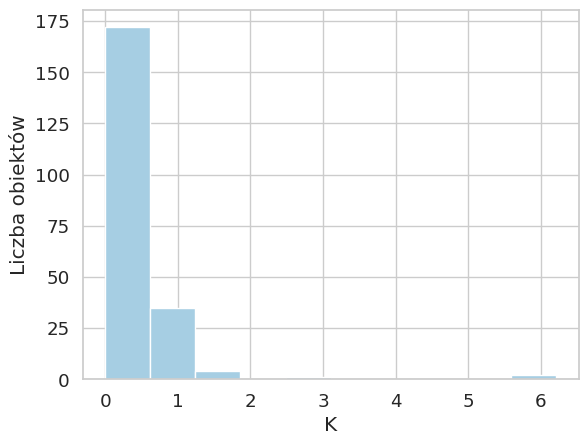

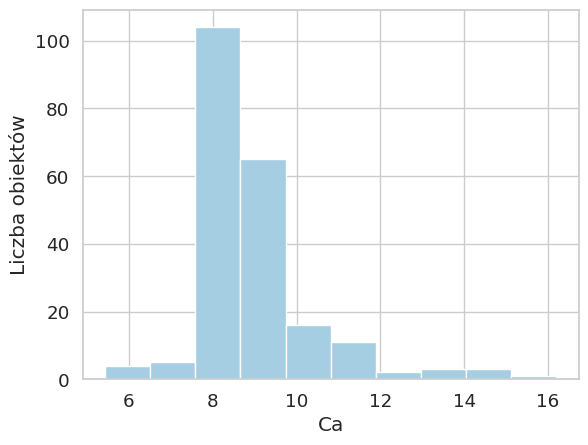

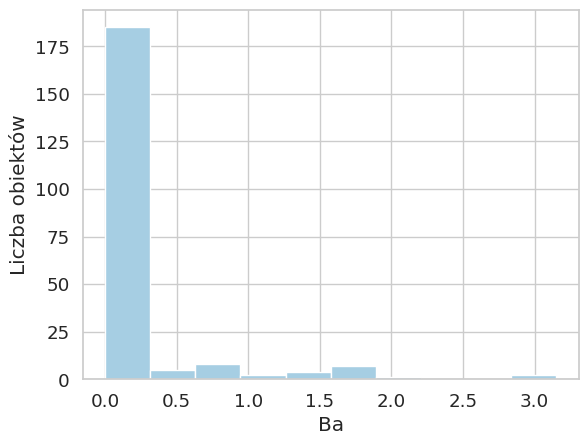

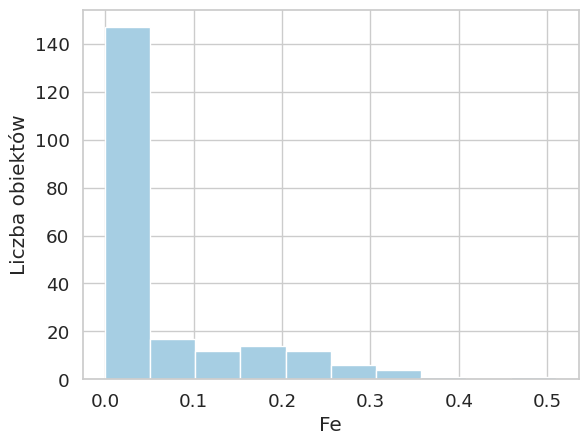

In [ ]:
#Liczba obiektów o poszczególnej zawartości 
for i in data[x_values].columns:
    plt.hist(data[x_values][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

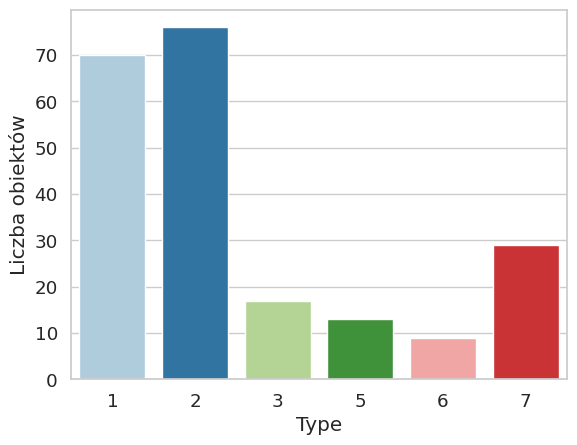

In [ ]:
for i in data[['Type']].columns:
    sns.barplot(x=data[['Type']][i].value_counts().index,y=data[['Type']][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

<AxesSubplot:>

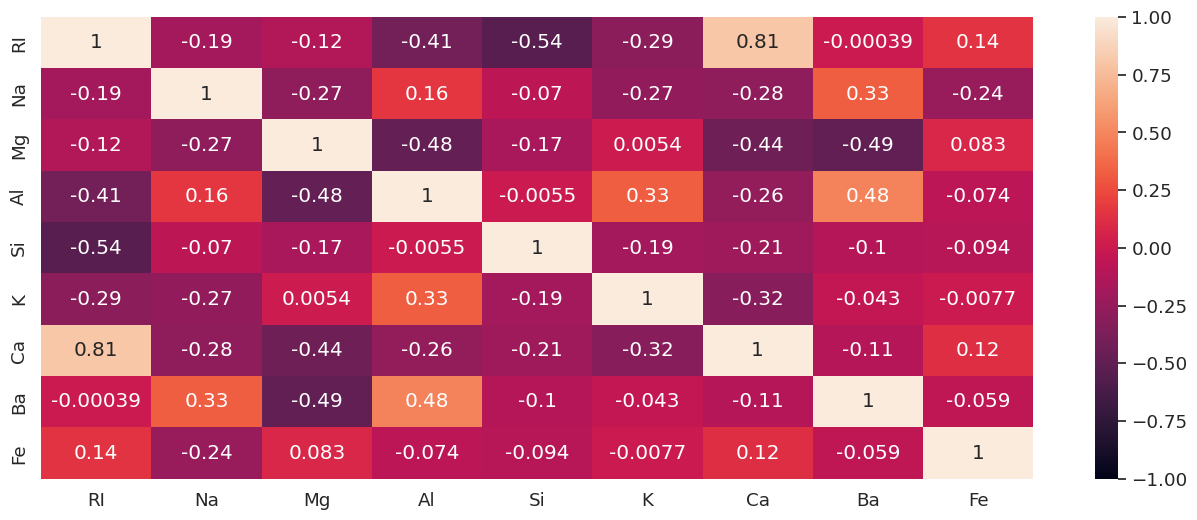

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data[cols].corr(method='pearson'), vmin=-1, vmax=1, annot=True)

Jak widać największa korelacja pierwiastków jest między  Mg i Ba (-0,49) oraz Al i Mg (-0,48) oraz współczynnik RI i pierwiastka Ca (0,81) i Si(-0,54)

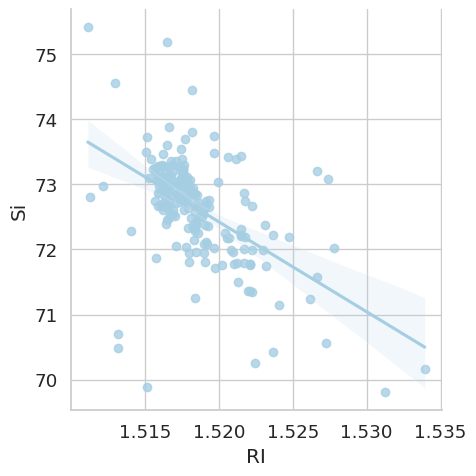

In [ ]:
#Wykres najbardziej skorelowanych zmiennych
sns.lmplot(x='RI', y='Si', data=data)
plt.show()

Na powyższym wykresie korelacji refrakcji z zawartością krzemu widać, że istnieje dominująca korelacja, ale także sporo punktów, które nie wykazują takiej zależności.

KeyboardInterrupt: 

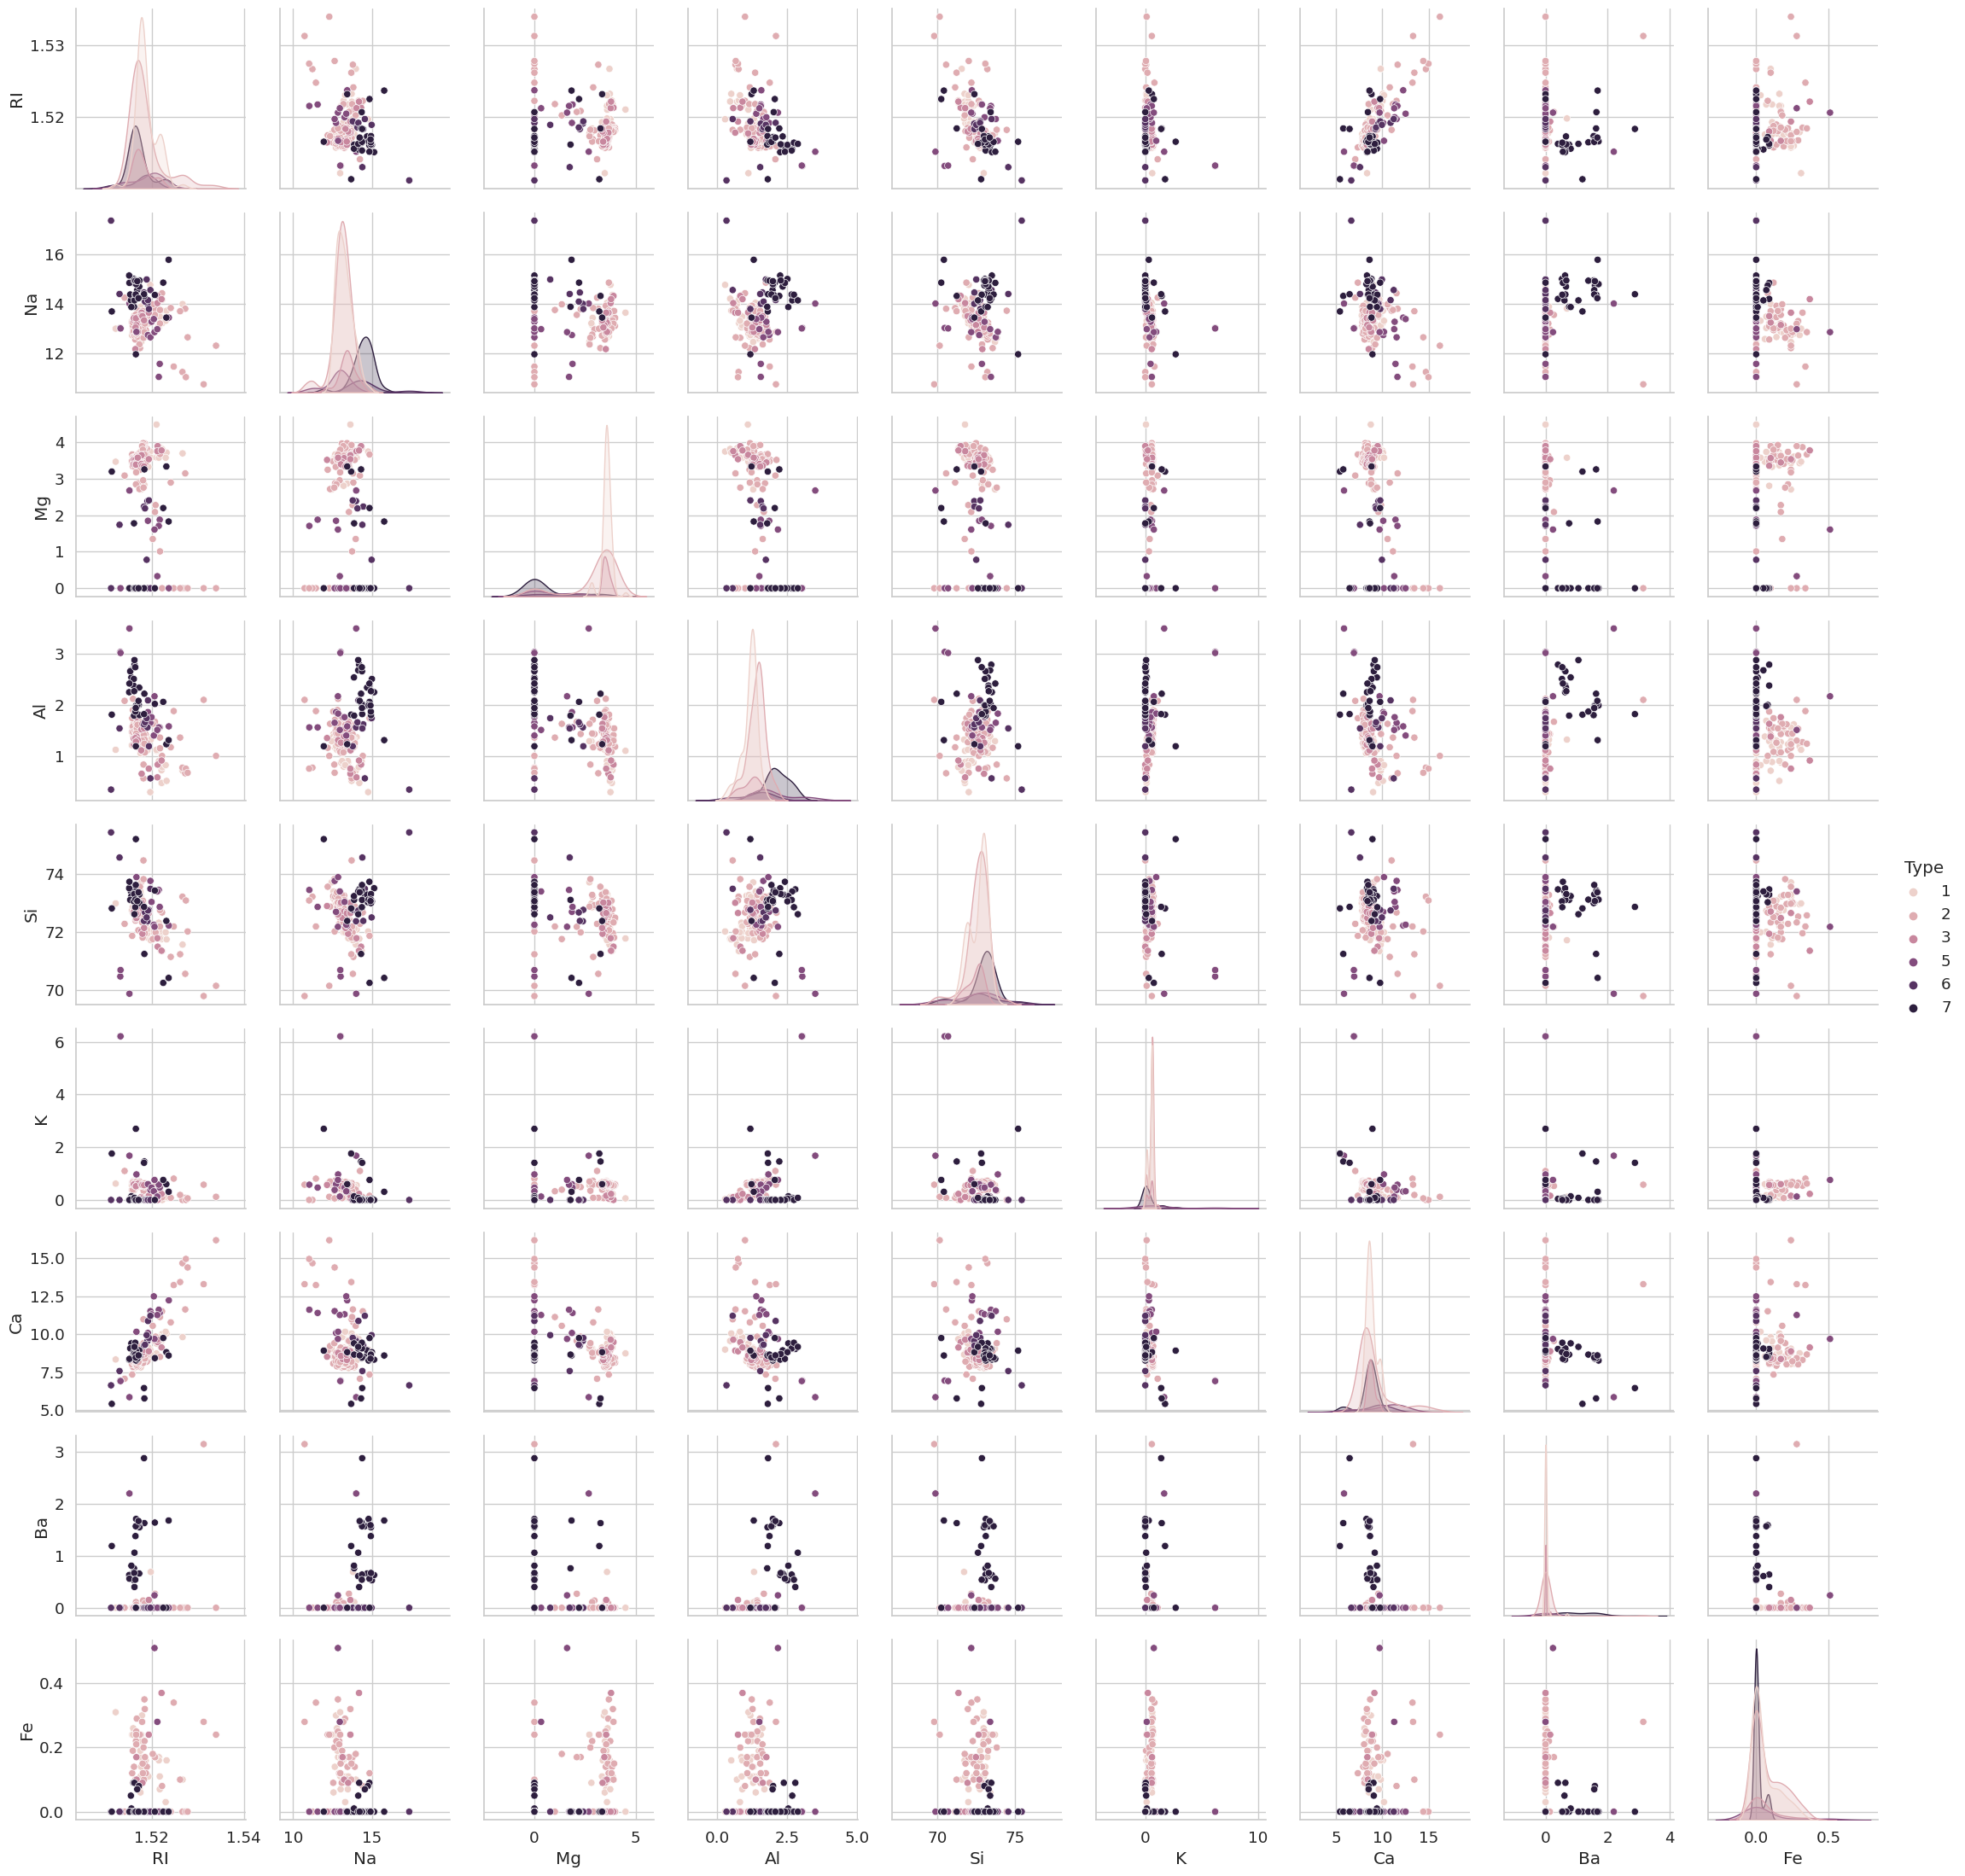

In [65]:
sns.pairplot(data,hue='Type')
plt.legend()
plt.show()

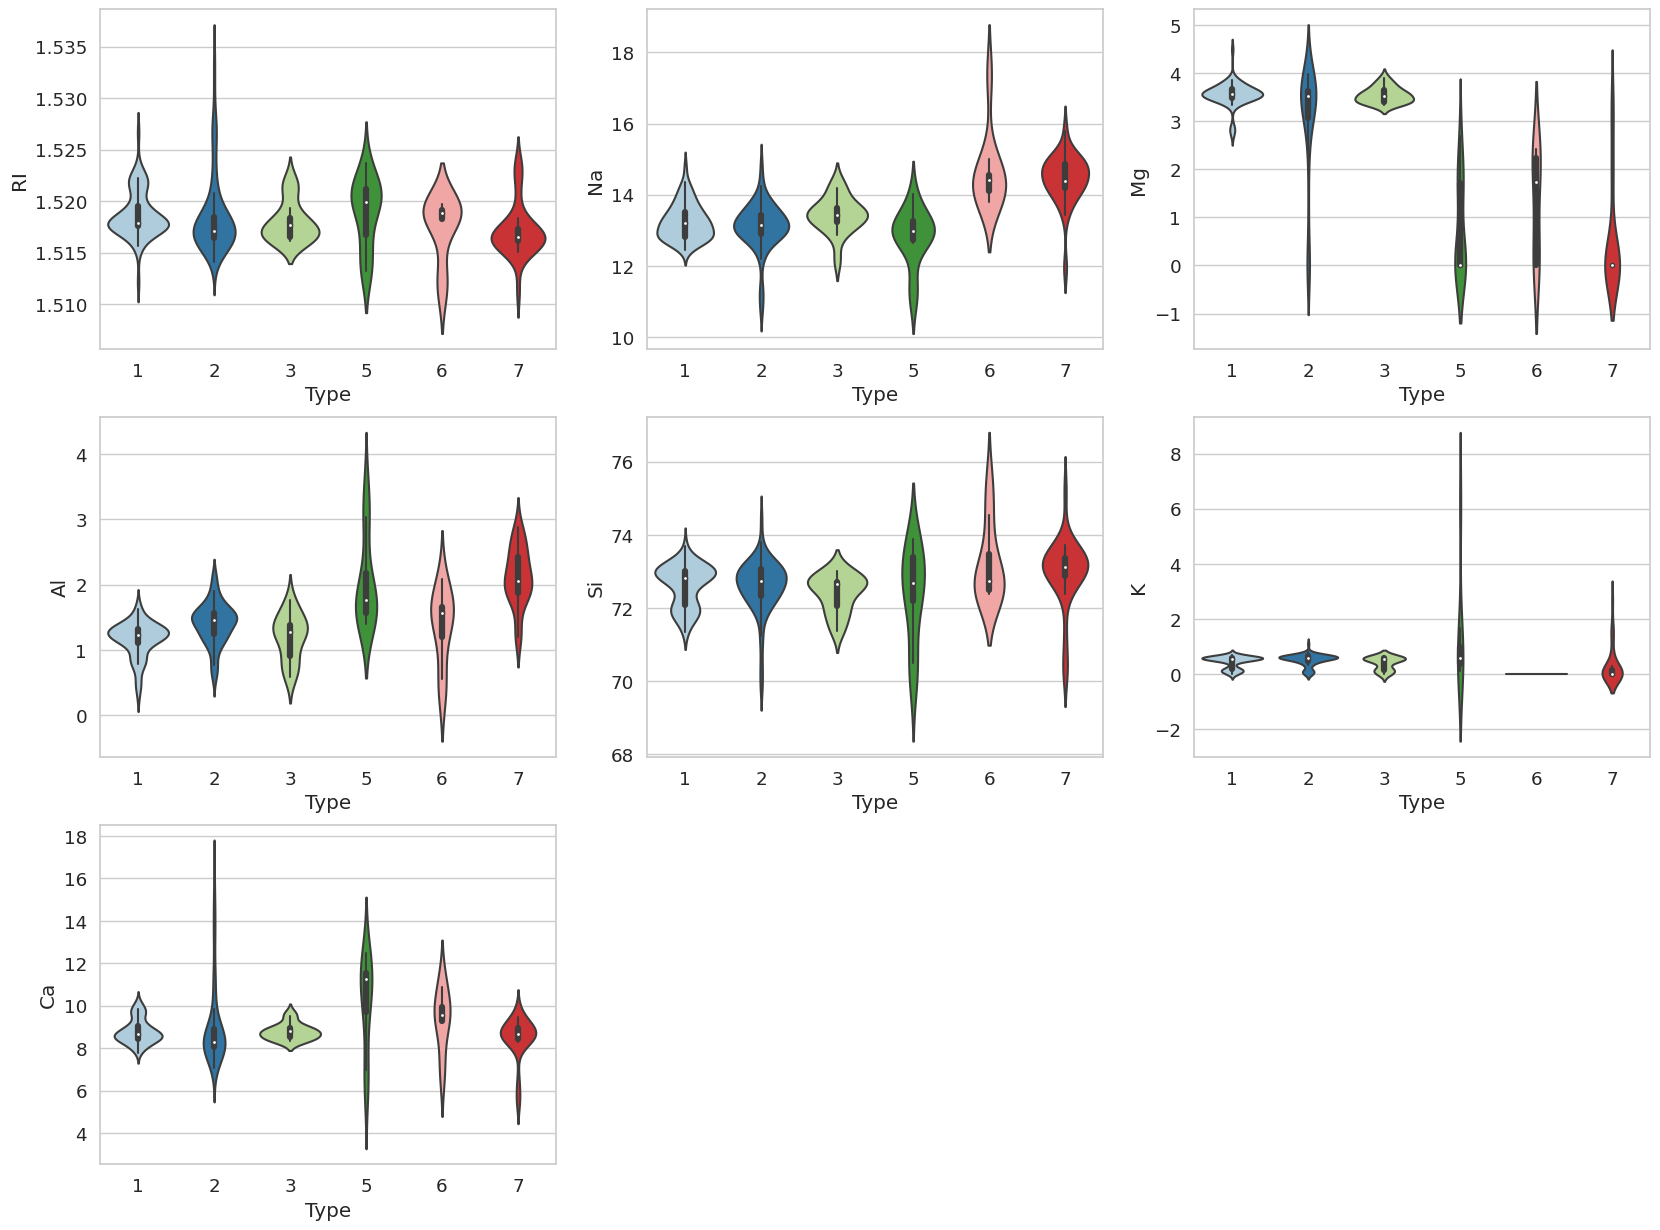

In [ ]:
sns.set(style = "whitegrid", font_scale = 1.2, palette = "Paired")
plt.subplots(figsize = (20, 15))

for i in range(1,8):
    plt.subplot(3, 3, i)
    sns.violinplot(x = 'Type', y = cols[i-1], data = data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

X = pd.DataFrame(data.drop(["Type"], axis = 1),
            columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
y = data.Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 40, stratify = y)

knn = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(1,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

n_neig = knn_cv_model.best_params_['n_neighbors']

knn_tuned = KNeighborsClassifier(n_neighbors = n_neig).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score for KNN: {}'.format(knn_accuracy))

Accuracy score for KNN: 0.7441860465116279


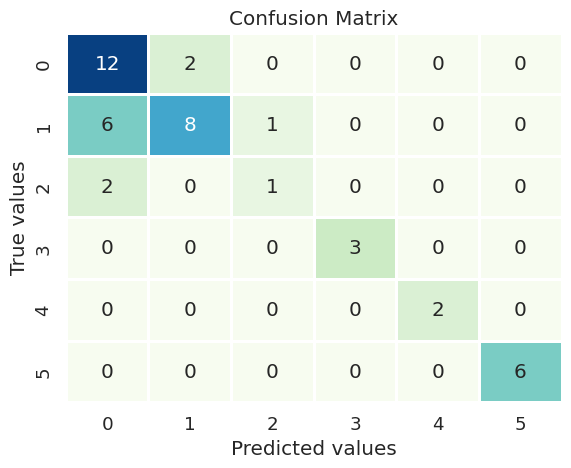

In [ ]:
#Confusion Matrix of KNN
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()

best K is: 1
prediction precision rate: 0.9


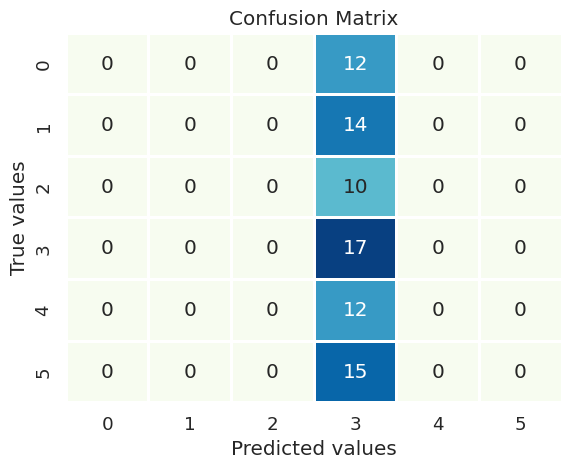

In [ ]:
data3=data[data['Type']==3]
data3=pd.concat([data3]*4)
data5=data[data['Type']==5]
data5=pd.concat([data5]*5)
data6=data[data['Type']==6]
data6=pd.concat([data6]*7)
data7=data[data['Type']==7]
data7=pd.concat([data7]*2)
data1=data[data['Type']==1]
data2=data[data['Type']==2]
data_balanced=pd.concat([data1,data2,data3,data5,data6,data7])
data_balanced.shape


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

# data.columns is column labels property
features=data_balanced.columns[:-1].tolist()
X=data_balanced[features].values
y=data_balanced['Type']

# normalization
min_max_scaler=preprocessing.MinMaxScaler()
X_minmax=min_max_scaler.fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X_minmax,y,test_size=0.2,random_state=1)
scores=[]
for k in range(32):
    knn=KNeighborsClassifier(k)
    score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
    score_mean=score_val.mean()
    scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
y_pred = knn_tuned.predict(X_test)
print("prediction precision rate:",knn.score(X_test,y_test))

#Confusion Matrix of KNN
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, lw = 2, cbar = False, cmap = 'GnBu')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()